In [1]:
# plotting
%matplotlib inline

# data analysis
import pandas as pd

# data visualization
from helper_functions import plot_setup
plot_setup()

In this part we'll look at support vector machines and how it performs compared with the previous model we trained (logistic regression). 

At the end, we'll introduce and discuss a concept called cross validation, which allows us to better evaluate our model and avoid a common problem known as model overfitting.

Again, we load the processed Titanic dataset.

In [2]:
titanic = pd.read_csv('titanic_processed.csv')

In [3]:
X = titanic.drop('survived', axis = 1)
y = titanic['survived']

### Support Vector Machines

Support Vector Machines is a complicated title for a fairly simple concept.

It comes down to finding a hyperplane which separates our items into two classes (hyperplane as opposed to line/curve because we can work in a number of dimensions - the number of dimensions depends on the number of features). Look below for how we use this to classify more than 2 classes.

The kernel (or function) specifies which shape of hyperplane is used. We will at first use a linear kernel, which means we are linearly separating our items for classification.

---

This might help you envision this on a 2-dimensional level:

Imagine an X-Y plane, with a bunch of dots representing data points scattered across the plan. In this X-Y plane, we only have dots which belong to one of two classes. We want to separate the dots by their class and we plan to use a line to do that. On one side of the line, we should have all the dots representing one class and on the other we should have the other class.

Small problem, though, our data isn't that simple to split. We can't find a line which puts all dots from one class on one side and all from another class on the other side. Some of our dots are mixed in with dots from the other class.

That's fine. Our model just tries to do its best and pick the best line which breaks up the dots as best as possible into two classes. Some dots will be misclassified, but as long as most aren't, we're still doing well. We also want to make sure that line is generalizable enough.

---
Okay, sounds great for separating items into two classes, but what happens if you have multiple classes, like we do in our iris example?

SVMs, like traditional Logisitic Regression models, are meant for binary classification, but they can also be used in multiclass cases.

We again use "one-versus-the-rest" to see which class has the greatest margin classification for the item. Which class the item seems to best fit into. Then we return that as the item's class.

In [5]:
from sklearn.svm import SVC

model = SVC(kernel='linear')

Our model with `gender`, `pclass`, and `age` performed best in the previous example, so let's start with that one.

In [6]:
X_sub = X[['pclass', 'gender', 'age']]

Separate the data into training and test sets using a 80/20 split.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

Train the model and predict the labels for this new model.<br />

(Note: All of our code so far, except `model = SVC(kernel='linear')` has been identical to the code for Logistic Regression. That's the great thing about using `scikit-learn'. It is easy to swap out models, so you can focus on what the right model is, as opposed to the implementation.)

In [9]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

What is the accuracy of this new model?

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.77033492822966509

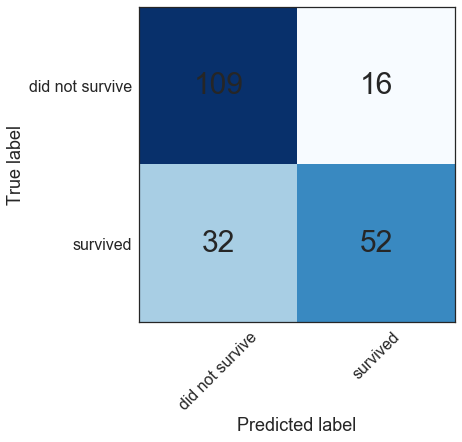

In [13]:
# data visualization
from helper_functions import plot_confusion_matrix

plot_confusion_matrix(y_test, y_pred)

What is the accuracy of the support vector machine classifier after we add family status as a feature?

In [14]:
# TODO - train/test split

In [15]:
# TODO - train
# TODO - predict

In [16]:
# TODO - accuracy

In [17]:
# TODO - plot

How does support vector machine model do compared to logistic regression for the same number of features?

Let's now try to use a different kernel for our SVM. As you can imagine, it is not likely that a hyperplane (rather than a hypersurface) would do well in separating the data. We will now try to use a polynomial kernel instead of a linear one in the previous example and see if that helps our accuracy score.

In [20]:
model = SVC(kernel = 'poly', degree = 2)

In [21]:
# TODO - select the features

In [14]:
# TODO - train/test split

In [15]:
# TODO - train
# TODO - predict

In [16]:
# TODO - accuracy

In [17]:
# TODO - plot

In [25]:
y_pred = model.predict(X_test)

0.77033492823


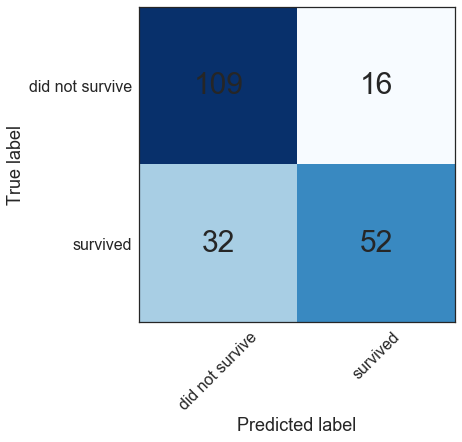

In [26]:
print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

#### Overfitting and Cross Validation

There's a common problem that happens when building models. It's called _overfitting_.

The goal of a model is to learn generalizations from a training set of data and use these generalizations to predict future unknown examples.

Our generalizations are only as good as the diversity of our training set/previous examples. Overfitting happens when you learn too much from a specific set of examples, in a way that makes them worse generalizations for unseen data.

This can easily happen if we always use the same training and test sets. We can get really good at learning exactly the right coefficients and parameters for our models, so that we always do well on our test set. Then when we get unseen data in the future, we perform terribly, because the data are not similar to the test set we worked with.

This is where cross validation can come in.

With cross validation, we use the same data, but work with several train/test splits of that data. We average the accuracy across all runs with these different train/test splits and use that as the accuracy of our model. By using different splits, we get a more diverse set of test sets and it is more likely that our learned model can handle more diverse examples in the future.

Cross validation allows us to make more use of the data we have, and create better generalizing models, without having to collect significantly more data (though of course, the more examples you have, the better!)

We use the `cross_val_score` to compute the cross-validation accuracy score of model. The `cv` parameter determines cross-validation splitting strategy. For an integer (N), it splits the data into N training and test sets and determines the accuracy score for each of them. N can be as large as the number of your samples; when N is equal to the number of samples we call that _leave one out_. In each step of leave one out cross validation we only have 1 data point in our test set, and all but one data points in the training set.

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_sub, y, cv=5)

Using a mean of cross validated accuracy scores provides a better indicator of how our model is performing, and whether the tweaks we're making are improving the model or just overfitting it to the training data.

In [ ]:
cross_val_score(model, X_sub, y, cv=5).mean()